# Pruébate 5 
1. Lee en un dataframe *woman_parl*, el contenido del archivo **WomanParliaments.csv** que almacena, por país, el porcentaje de escaños parlamentarios ocupados por mujeres desde 1997.


In [68]:
# Librerias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

# woman_parl
woman_parl = pd.read_csv('WomanParliaments.csv')
woman_parl

,Country Name,Country Code,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,NaN,27.868852,27.016129
2,Angola,AGO,9.545455,15.454545,15.454545,15.454545,15.454545,15.454545,15.454545,15.000000,...,38.181818,34.090909,34.090909,36.818182,36.818182,36.818182,30.454545,30.454545,30.000000,30.000000
3,Albania,ALB,NaN,NaN,5.161290,5.161290,5.714286,5.714286,5.714286,6.428571,...,15.714286,15.714286,17.857143,20.000000,20.714286,22.857143,27.857143,27.857143,29.508197,29.508197
4,Andorra,AND,7.142857,7.142857,7.142857,7.142857,14.285714,14.285714,14.285714,14.285714,...,50.000000,50.000000,50.000000,50.000000,39.285714,32.142857,32.142857,32.142857,46.428571,46.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,NaN,0.664452,0.664452,0.664452,0.668896,0.668896,0.332226,0.332226,...,0.332226,0.332226,0.332226,0.332226,0.000000,0.000000,0.000000,0.000000,0.332226,0.332226
261,South Africa,ZAF,25.000000,28.750000,30.000000,29.824561,29.824561,29.824561,29.824561,32.778702,...,42.250000,42.250000,42.250000,41.500000,42.000000,42.000000,41.836735,42.748092,46.347607,46.750000
262,Zambia,ZMB,9.677419,10.256410,10.126582,10.126582,10.126582,12.025316,12.025316,12.025316,...,11.464968,11.464968,11.464968,10.759494,12.658228,17.964072,17.964072,17.964072,17.964072,16.766467


2. A partir del dataframe anterior obtén uno, **mexico**, donde únicamente almacenes la información de México.

In [24]:
mexico = woman_parl[woman_parl['Country Name'] == 'Mexico']
mexico = mexico.drop(['Country Code'], axis = 1)
mexico.set_index('Country Name',inplace=True)
mexico.index.name = ''
mexico = mexico.T
mexico.columns = ['Mexico']
mexico.head()

,Mexico
1997,14.2
1998,17.4
1999,18.2
2000,16.0
2001,16.0


3. Obtén otro dataframe, **mex_world**, con el promedio anual de todos los países y concaténalo con el de México para obtener el siguiente resultado.

In [36]:
world = pd.DataFrame(pd.DataFrame(woman_parl.loc[:,'1997':'2020']).mean())
world.columns = ['World']
world.head()

,World
1997,10.243278
1998,10.926304
1999,11.394605
2000,11.822155
2001,12.189253


In [37]:
mex_world = pd.concat([mexico,world],axis=1)
mex_world

,Mexico,World
1997,14.200000,10.243278
1998,17.400000,10.926304
1999,18.200000,11.394605
2000,16.000000,11.822155
2001,16.000000,12.189253
2002,16.000000,13.549565
2003,22.600000,13.827423
2004,22.600000,14.410010
2005,24.200000,15.279622
2006,22.600000,15.592122


4. Gráfica el dataframe anterior, utilizzando Pandas, e incluye una tabla con los índices de ambas series.


In [43]:
table = mex_world.loc['2005':'2020':5].T
table

,2005,2010,2015,2020
Mexico,24.200000,26.200000,42.369478,48.20000
World,15.279622,17.508532,20.761977,23.90838


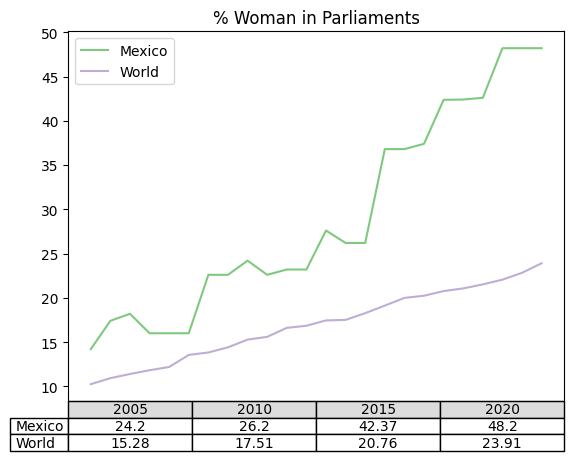

In [49]:
sns.set_palette('Accent')
mex_world.plot.line(title='% Woman in Parliaments',xticks=[])
plt.table(cellText=table.values.round(2),colLabels=table.columns,
          rowLabels=table.index,cellLoc='center',
          colColours=['gainsboro']*5)

5. Almacena en un dataframe, **metadata**, el cual indica a qué región pertenece cada país, y combínalo con el dataframe **woman_parl**, usando la columna Country Code- Obtén los promedios por región del año 2020. 

In [50]:
metada = pd.read_csv('Metadata_2.csv')
metada.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [51]:
info_region = woman_parl.merge(metada,on='Country Code')
info_region

,Country Name,Country Code,1997,1998,1999,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,Region,IncomeGroup,SpecialNotes,TableName
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income,NaN,Aruba
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.710843,27.710843,27.710843,NaN,27.868852,27.016129,South Asia,Low income,NaN,Afghanistan
2,Angola,AGO,9.545455,15.454545,15.454545,15.454545,15.454545,15.454545,15.454545,15.000000,...,36.818182,36.818182,30.454545,30.454545,30.000000,30.000000,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,Albania,ALB,NaN,NaN,5.161290,5.161290,5.714286,5.714286,5.714286,6.428571,...,20.714286,22.857143,27.857143,27.857143,29.508197,29.508197,Europe & Central Asia,Upper middle income,NaN,Albania
4,Andorra,AND,7.142857,7.142857,7.142857,7.142857,14.285714,14.285714,14.285714,14.285714,...,39.285714,32.142857,32.142857,32.142857,46.428571,46.428571,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,"Yemen, Rep.",YEM,NaN,0.664452,0.664452,0.664452,0.668896,0.668896,0.332226,0.332226,...,0.000000,0.000000,0.000000,0.000000,0.332226,0.332226,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,South Africa,ZAF,25.000000,28.750000,30.000000,29.824561,29.824561,29.824561,29.824561,32.778702,...,42.000000,42.000000,41.836735,42.748092,46.347607,46.750000,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,Zambia,ZMB,9.677419,10.256410,10.126582,10.126582,10.126582,12.025316,12.025316,12.025316,...,12.658228,17.964072,17.964072,17.964072,17.964072,16.766467,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [54]:
info_region = info_region[['Region','2020']].groupby(['Region']).mean()
info_region

,2020
Region,
East Asia & Pacific,16.531978
Europe & Central Asia,29.814495
Latin America & Caribbean,28.145326
Middle East & North Africa,17.234940
North America,28.229436
South Asia,17.509109
Sub-Saharan Africa,22.672044


6. Crea un gráfico de barras del dataframe anterior con seaborn.

In [70]:

importlib.reload(plt)
print(plt.xticks)

<function xticks at 0x000002D04A6DD6C0>


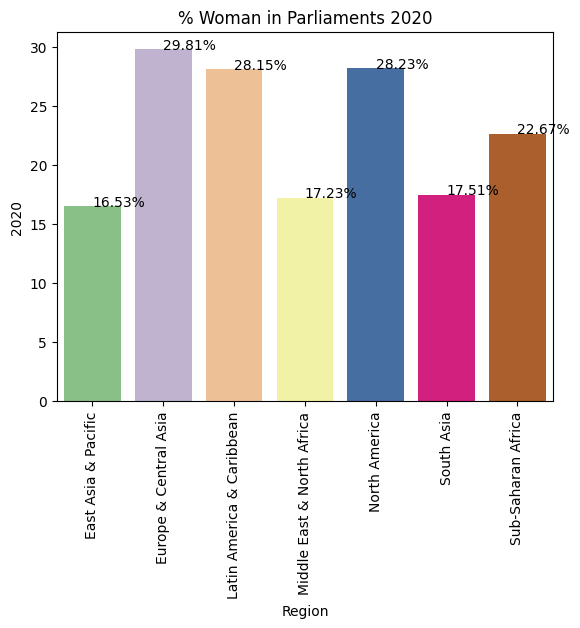

In [76]:
sns.barplot(x=info_region.index,y='2020',data=info_region,hue='Region')
plt.title('% Woman in Parliaments 2020')
plt.xticks(rotation=90)
for i in range(info_region.shape[0]):
    plt.text(i,info_region.iloc[i,0],str(f'{info_region.iloc[i,0]:.2f}')+'%')

7. Gráfica con Matplotlib la información de **woman_parl_2020** en un boxplot y ubica a México según el valor de su índice.

Text(1.1, 53.2, 'MEX')

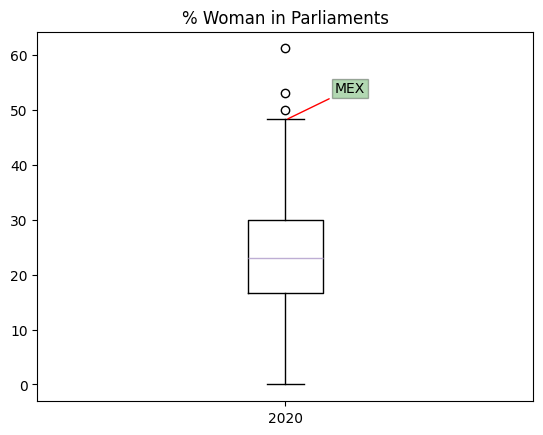

In [83]:
plt.boxplot(woman_parl['2020'].dropna(),labels=['2020'])
plt.title('% Woman in Parliaments')
mex_value = woman_parl.loc[woman_parl['Country Code'] == 'MEX','2020'].tolist()[0]
plt.annotate('MEX',xy=(1,mex_value),xytext=(1.1,mex_value +5),
             arrowprops=dict(arrowstyle = '-',color = 'red'),
             bbox=dict(facecolor='green',alpha=0.3,pad=2))

In [91]:
data = {
    "Country Code" : ['MEX','BRA','ARG'],
    "2016" : [3.5824,0.8635,5.3174],
    "2017" : [4.162,4.9089,2.6154],
    "2018" : [6.0037,4.0531,0.4932],
    "2019" : [1.4772,-2.3822,8.991],
    "2020" : [-7.2845,-1.7561,-17.7238]
}
exports = pd.DataFrame(data)
exports

,Country Code,2016,2017,2018,2019,2020
0,MEX,3.5824,4.1620,6.0037,1.4772,-7.2845
1,BRA,0.8635,4.9089,4.0531,-2.3822,-1.7561
2,ARG,5.3174,2.6154,0.4932,8.9910,-17.7238


<Axes: >

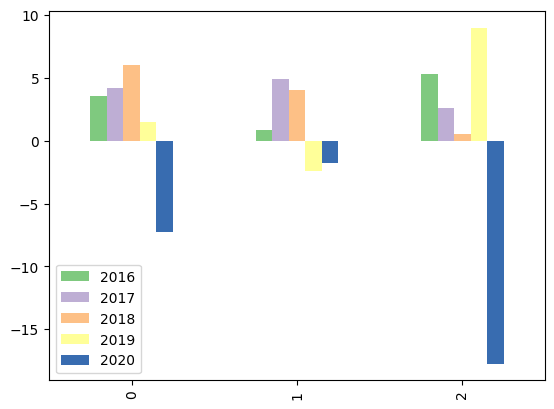

In [92]:
exports.plot.bar()

In [94]:
data = {
    "Country Name" : ['Mexico'],
    "1966" : [7.41],
    "1967" : [5.88],
    "1968" : [7.92],
    "1969" : [7.04]
}
mexico = pd.DataFrame(data)
mexico.set_index('Country Name',inplace = True)
mexico

,1966,1967,1968,1969
Country Name,,,,
Mexico,7.41,5.88,7.92,7.04


([0, 1, 2, 3],
 [Text(0, 0, '1966'),
  Text(1, 0, '1967'),
  Text(2, 0, '1968'),
  Text(3, 0, '1969')])

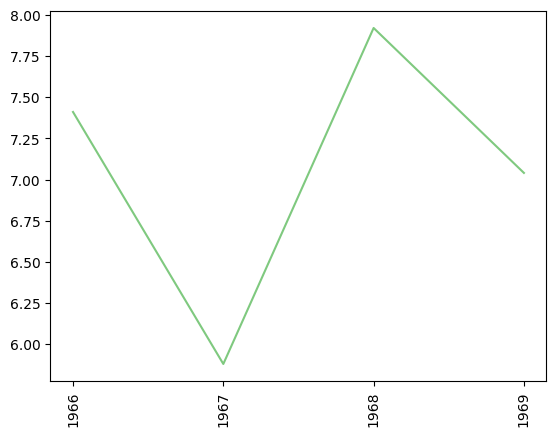

In [99]:
plt.plot(mexico.T.loc['1966':'1969',:])
plt.xticks(rotation=90)